# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as tts
data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [11]:
data.MEDV.shape #Valor que queremos predecir
X_train, X_test, y_train, y_test = tts(data, data.MEDV)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((379, 14), (127, 14), (379,), (127,))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [26]:
from sklearn.ensemble import RandomForestRegressor as RFR
rf=RFR()

rf.fit(X_train, y_train) # Entrenamiento con el 80% de los datos
rf.fit(X_test, y_test) # Entrenamiento con el 20% de los datos

y_pred_train =rf.predict(X_test) #Predicción entrenada con el 80% de los datos

y_pred_train # Esta es la predicción que ha hecho el modelo de la variable MEDV

array([19.164, 20.964, 10.891,  7.307, 13.392, 17.857, 46.188, 17.474,
       44.733, 31.723, 14.979, 23.502, 13.385, 24.81 , 16.519, 16.72 ,
        8.224, 30.758, 16.672, 21.519, 24.638, 21.005, 14.497,  8.35 ,
       31.166, 49.745, 19.93 , 15.331, 19.214, 19.446, 16.15 , 16.046,
       17.867, 18.38 , 14.304, 22.847,  6.669, 13.465, 37.91 ,  6.217,
       23.192, 10.363, 22.084, 23.949, 18.524, 13.741, 49.085, 21.439,
       15.589, 19.585, 19.574, 20.21 , 20.042, 29.496, 21.422, 47.75 ,
       49.19 , 21.639, 22.4  , 18.284,  8.062,  7.525, 20.801, 44.39 ,
        9.579, 22.95 , 23.329, 19.438, 18.707, 36.462, 15.576, 18.212,
       11.237, 21.005, 18.065, 33.524, 23.186, 20.691, 14.257, 11.383,
       11.381, 17.145, 13.739, 16.086, 23.978, 15.611, 17.416, 48.165,
       13.548, 18.588, 21.411, 29.622, 22.05 , 24.809, 19.146, 17.978,
       29.577, 20.668, 24.76 , 28.693, 14.455, 37.675, 18.695, 10.681,
       20.901, 20.068, 16.525, 22.194, 14.894, 20.814,  8.115, 19.419,
      

## 3. Calculate and print R-squared for both the training and the testing set.

In [28]:
rf.score(X_test, y_test) #Acierto casi perfecto, consiste en Dividir mi error entre mi varianza

0.9992889206863886

## 4. Calculate and print mean squared error for both the training and the testing set.

In [30]:
# Error medio cuadrático:  mide la cantidad de error que hay entre dos conjuntos de datos
from sklearn.metrics import mean_squared_error as mse
mse(y_test, y_pred, squared=False)

0.1962416556227887

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [31]:
# MAE: Measure of errors between paired observations expressing the same phenomenon
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

0.09359055118110364

## Classification Model Evaluation

In [32]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [38]:
data['class'].shape #Valor que queremos predecir
X_train, X_test, y_train, y_test = tts(data, data['class'])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 5), (38, 5), (112,), (38,))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [71]:
from sklearn.linear_model import LogisticRegression 
svc=SVC().fit(X_train, y_train)

y_pred=svc.predict(X_test)

y_pred[:10]

array([0, 0, 1, 0, 0, 0, 1, 2, 0, 2])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [74]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)


1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

## 10. Calculate and print the precision score for both the training and the testing set.

## 11. Calculate and print the recall score for both the training and the testing set.

In [75]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [76]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [77]:
from sklearn.metrics import confusion_matrix as cm

cm(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  9]], dtype=int64)

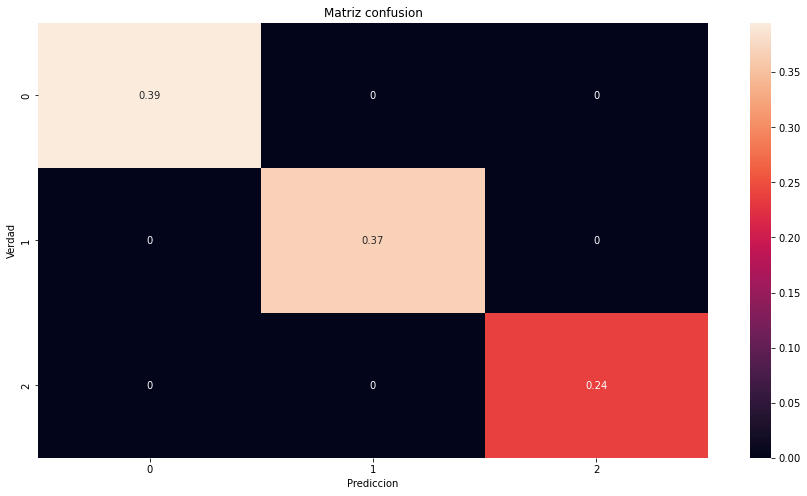

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/sum(sum(cm(y_test, y_pred))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.